In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister
from qiskit import QuantumRegister, execute

from qiskit.visualization import plot_histogram


In [2]:
n = 3
s = '011'

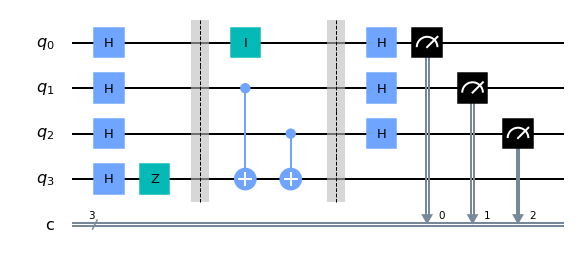

In [4]:
bv_circuit = QuantumCircuit(n+1,n)
bv_circuit.h(n)
bv_circuit.z(n)

for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

s = s[::-1]
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q,n)

bv_circuit.barrier()
for i in range(n):
    bv_circuit.h(i)

for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(bv_circuit, backend = backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)


least busy backend:  qasm_simulator


In [21]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and 
                                      x.configuration().n_qubits >= 2 and 
                                      not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-10-02 22:11:44,867: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_ourense


In [23]:
from qiskit.tools.monitor import job_monitor 
shots = 1024
job = execute(bv_circuit, backend = backend, shots = shots)
job_monitor(job, interval = 2)


Job Status: job has successfully run


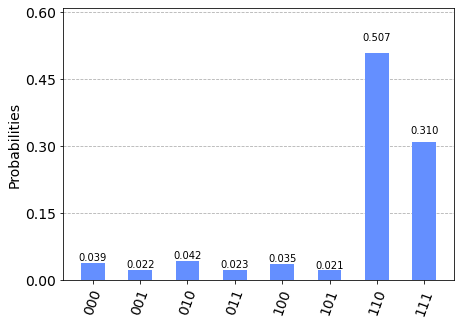

In [24]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [25]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}